<a href="https://colab.research.google.com/github/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/Confusion_Matrix_Exercise_(Practice)_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Confusion Matrix Exercise (Practice) - SOLUTION


- [Assignment Link](https://login.codingdojo.com/m/213/7198/63592)
- Solution by: Josh Johnson
- 4/11/2022

# Instructions


This task uses a breast cancer data set that can be found [here.](https://drive.google.com/file/d/1Zms1RfgkWrTp7S6_BFpeELYyvX1s2FSN/view?usp=sharing)  The target vector is the diagnosis as either malignant (M) or benign (B).  

Your task for this exercise is to create a confusion matrix visualized as a heatmap. 

Use the results of the tree models you created in the Classification Tree Exercise based on the the breast cancer data set as the basis for your confusion matrix.  The data for that exercise can be found here.  The target vector is the diagnosis as either malignant (M) or benign (B).  


# Solution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
## Load in the dataset from url
fpath = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR3X81gX_Zlbs4j244cQbBe04CTZbJ-Dl6EwNzKZRFngs9XZu_9dzVDuzzpZJgCj6xqS8oHR8K3eqr9/pub?output=csv"

df = pd.read_csv(fpath, index_col=0)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
## Make X and y 
target = 'diagnosis'
X = df.drop(columns=target).copy()
y = df[target].copy()

## Convert y to numeric
target_map = {'M':1,'B':0}
y = y.map(target_map)

In [ ]:

## train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8913,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
915691,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
904689,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
9110732,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
881046502,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120


### Modeling

In [ ]:
## Evaluation function
def evluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the R^2 values for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train,y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test,y_test):.3f}")


In [ ]:
## Make, fit, and evalaute Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

evluate_classification(tree_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.951


In [ ]:
## Make, fit, and evalaute BaggingClassifier
bag_clf = BaggingClassifier(random_state=42)
bag_clf.fit(X_train, y_train)

evluate_classification(bag_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.993
Test Accuracy: 0.951


In [ ]:
## Make, fit, and evaluate RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

evluate_classification(rf_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.965


> The best model, according to the test accuracy, is the RandomForestClassifier: 
- Training accuracy: 1.0
- Test accuracy: 0.965

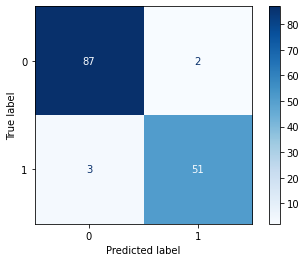

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap = 'Blues');

1. What was the accuracy of the model?

In [2]:
# Accuracy
accuracy = (87 + 51) / (87 + 51 + 2 + 3)
print('The accuracy of this model on the test set is: ', accuracy)

The accuracy of this model on the test set is:  0.965034965034965


2. I set 'M' to be the positive class, since that is what we are most interested in detecting.

3. There were 2 false positives

4. There were 3 false negatives

5. False negatives are probably more problematic than false positives, as they represent breast cancer that goes untreated.